In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cv2.cvtColor is an OpenCV function to convert images to different color spaces
def convertToRGB(img): 
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
def detect_faces(f_cascade, colored_img, scaleFactor =1.1,minNeighbors=5):
 #just making a copy of image passed, so that passed image is not changed 
 img_copy = colored_img.copy()          
 
 #convert the test image to gray image as opencv face detector expects gray images
 gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)          
 
 #let's detect multiscale (some images may be closer to camera than others) images
 faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors);          
 
 #go over list of faces and draw them as rectangles on original colored img
 for (x, y, w, h) in faces:
      cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)              
 
 faceNum = len(faces) 
 return img_copy, faceNum

# 作業: 
1. 使用faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5); 
修改 scaleFactor, minNeighbor兩個參數計算 test5.jpg 有幾張臉

2. load cascade classifier training file for haarcascade 
3. load cascade classifier training file for lbpcascade 


In [4]:
#load cascade classifier training file for haarcascade 
haar_face_cascade = cv2.CascadeClassifier('..\\data\\haarcascade_frontalface_alt.xml')
lbp_cascade = cv2.CascadeClassifier('..\\data\\lbpcascade_frontalcatface.xml')

In [5]:
#load another image 
test = cv2.imread('..\\data\\test5.jpg')  

In [6]:
for i in range(11,21):
    for neighbor in range(1,11):
        faces_detected_img ,facenum = detect_faces(haar_face_cascade, test,scaleFactor =i/10,
                                           minNeighbors = neighbor)  
        print(f'Faces found with scaleFactor= {i/10} and minNeighbors ={neighbor}: {facenum}')

Faces found with scaleFactor= 1.1 and minNeighbors =1: 10
Faces found with scaleFactor= 1.1 and minNeighbors =2: 6
Faces found with scaleFactor= 1.1 and minNeighbors =3: 5
Faces found with scaleFactor= 1.1 and minNeighbors =4: 5
Faces found with scaleFactor= 1.1 and minNeighbors =5: 4
Faces found with scaleFactor= 1.1 and minNeighbors =6: 4
Faces found with scaleFactor= 1.1 and minNeighbors =7: 4
Faces found with scaleFactor= 1.1 and minNeighbors =8: 4
Faces found with scaleFactor= 1.1 and minNeighbors =9: 3
Faces found with scaleFactor= 1.1 and minNeighbors =10: 3
Faces found with scaleFactor= 1.2 and minNeighbors =1: 6
Faces found with scaleFactor= 1.2 and minNeighbors =2: 5
Faces found with scaleFactor= 1.2 and minNeighbors =3: 5
Faces found with scaleFactor= 1.2 and minNeighbors =4: 3
Faces found with scaleFactor= 1.2 and minNeighbors =5: 3
Faces found with scaleFactor= 1.2 and minNeighbors =6: 3
Faces found with scaleFactor= 1.2 and minNeighbors =7: 3
Faces found with scaleFactor=

In [19]:
img1=cv2.resize(faces_detected_img,(800,600),interpolation=cv2.INTER_AREA)
cv2.imshow('Test Imag', img1) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

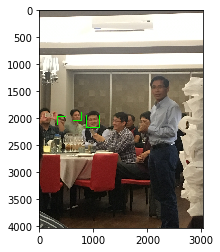

In [20]:
plt.imshow(convertToRGB(faces_detected_img))

In [27]:
for i in range(11,21):
    for neighbor in range(1,7):
        faces_detected_img2 ,facenum2 = detect_faces(lbp_cascade, test,scaleFactor =i/10,
                                           minNeighbors = neighbor)  
        print(f'Faces found with scaleFactor= {i/10} and minNeighbors ={neighbor}: {facenum2}')

Faces found with scaleFactor= 1.1 and minNeighbors =1: 28
Faces found with scaleFactor= 1.1 and minNeighbors =2: 5
Faces found with scaleFactor= 1.1 and minNeighbors =3: 1
Faces found with scaleFactor= 1.1 and minNeighbors =4: 1
Faces found with scaleFactor= 1.1 and minNeighbors =5: 0
Faces found with scaleFactor= 1.1 and minNeighbors =6: 0
Faces found with scaleFactor= 1.2 and minNeighbors =1: 10
Faces found with scaleFactor= 1.2 and minNeighbors =2: 0
Faces found with scaleFactor= 1.2 and minNeighbors =3: 0
Faces found with scaleFactor= 1.2 and minNeighbors =4: 0
Faces found with scaleFactor= 1.2 and minNeighbors =5: 0
Faces found with scaleFactor= 1.2 and minNeighbors =6: 0
Faces found with scaleFactor= 1.3 and minNeighbors =1: 3
Faces found with scaleFactor= 1.3 and minNeighbors =2: 0
Faces found with scaleFactor= 1.3 and minNeighbors =3: 0
Faces found with scaleFactor= 1.3 and minNeighbors =4: 0
Faces found with scaleFactor= 1.3 and minNeighbors =5: 0
Faces found with scaleFactor=

In [22]:
img1=cv2.resize(faces_detected_img2,(800,600),interpolation=cv2.INTER_AREA)
cv2.imshow('Test Imag', img1) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

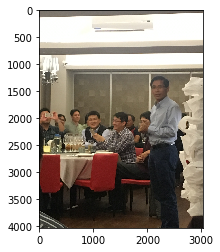

In [24]:
plt.imshow(convertToRGB(faces_detected_img2))

### 用haar訓練的模型效果比 lbp 要好很多